In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
# Load Benin dataset
df = pd.read_csv('data/benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

# Missing values report
print("\nMissing Values:")
missing = df.isna().sum()
print(missing)

# Columns with >5% missing
threshold = len(df) * 0.05
print("\nColumns with >5% Missing:")
print(missing[missing > threshold])

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [5]:
# Compute Z-scores for key columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_zscores = df[key_columns].apply(zscore, nan_policy='omit')

# Flag outliers (|Z| > 3)
outliers = (df_zscores.abs() > 3).any(axis=1)
print(f"Number of rows with outliers: {outliers.sum()}")

# Impute missing values with median for key columns
for col in key_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing Timestamp or critical columns
df.dropna(subset=['Timestamp'], inplace=True)

# Export cleaned DataFrame
df.to_csv('data/benin_clean.csv', index=False)
print("Cleaned data saved to data/benin_clean.csv")

Number of rows with outliers: 7740


C:\Users\jakin\AppData\Local\Temp\ipykernel_19900\2258672702.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\jakin\AppData\Local\Temp\ipykernel_19900\2258672702.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Cleaned data saved to data/benin_clean.csv


C:\Users\jakin\AppData\Local\Temp\ipykernel_16044\267626802.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\jakin\AppData\Local\Temp\ipykernel_16044\267626802.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('plots/ghi_dni_dhi_tamb_time_series.png')
c:\Users\jakin\Documents\KIAM program\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


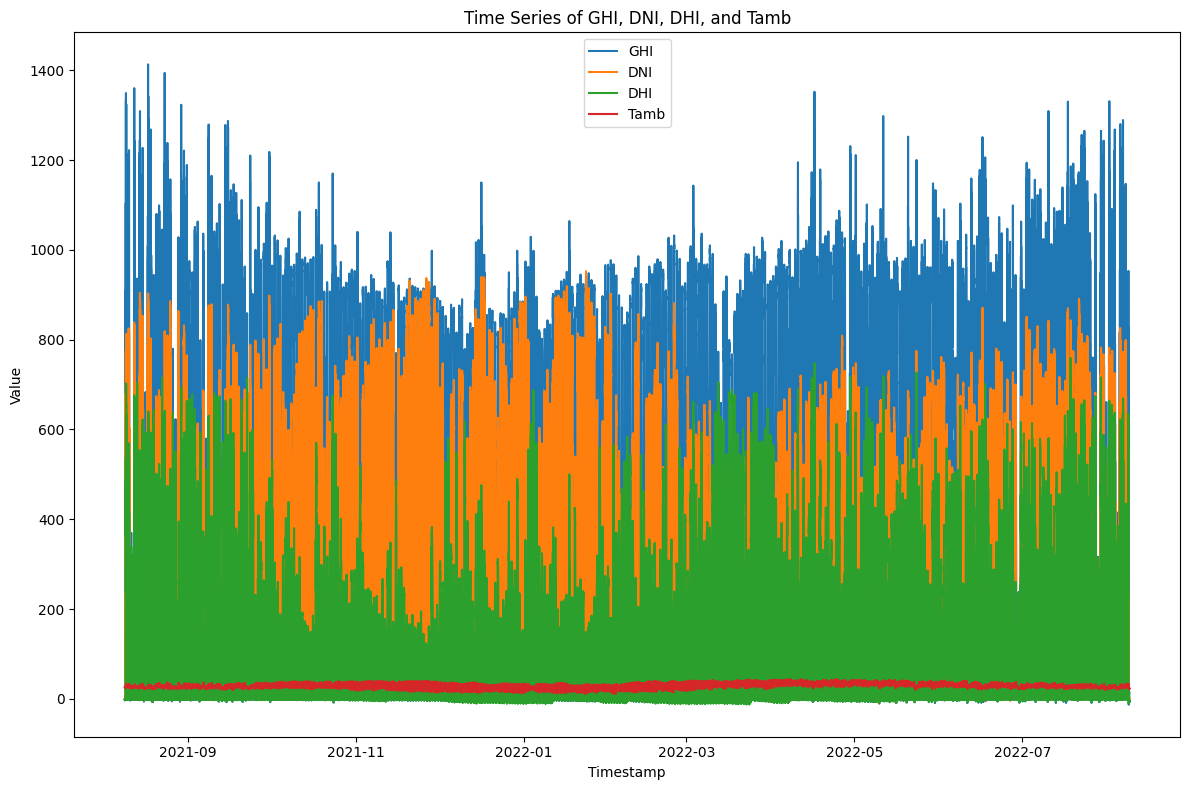

In [5]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(12, 8))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.legend()
plt.tight_layout()
plt.savefig('plots/ghi_dni_dhi_tamb_time_series.png')
plt.show()

Average ModA and ModB by Cleaning Flag:
                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


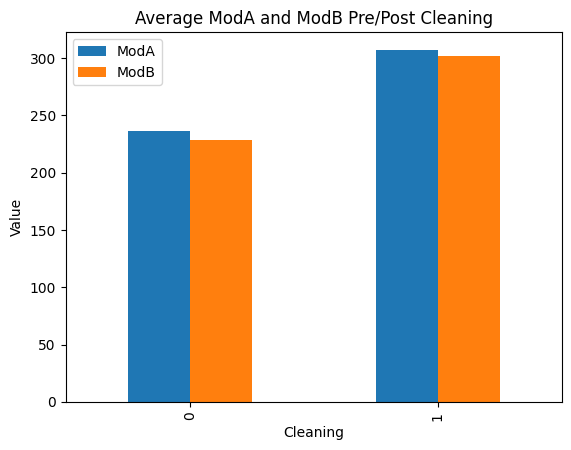

In [6]:
# Group by Cleaning flag and compute average ModA, ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA and ModB by Cleaning Flag:")
print(cleaning_impact)

# Plot
cleaning_impact.plot(kind='bar', title='Average ModA and ModB Pre/Post Cleaning')
plt.ylabel('Value')
plt.savefig('plots/cleaning_impact.png')
plt.show()

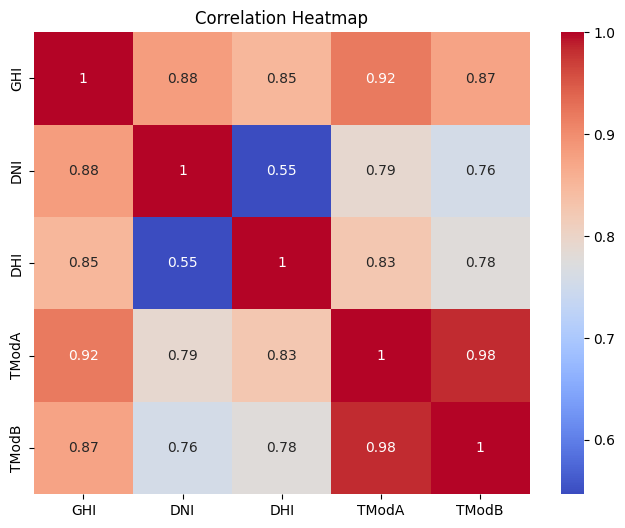

In [7]:
# Correlation heatmap
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('plots/correlation_heatmap.png')
plt.show()

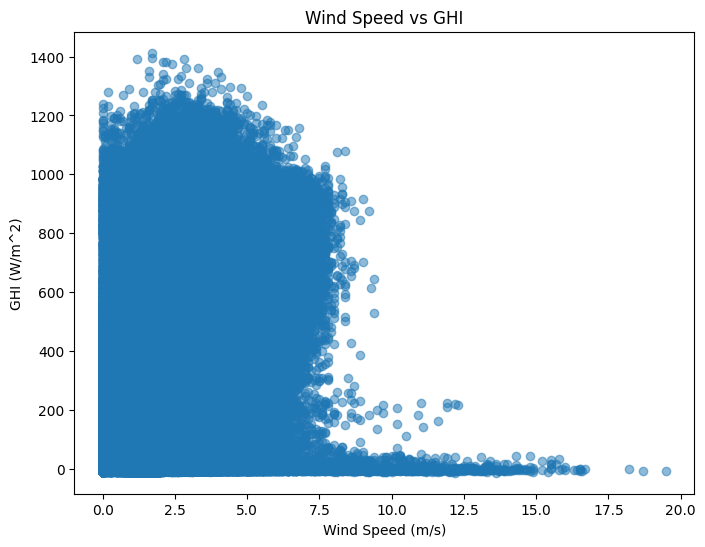

In [8]:
# Scatter plot: WS vs GHI
plt.figure(figsize=(8, 6))
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m^2)')
plt.title('Wind Speed vs GHI')
plt.savefig('plots/ws_vs_ghi.png')
plt.show()

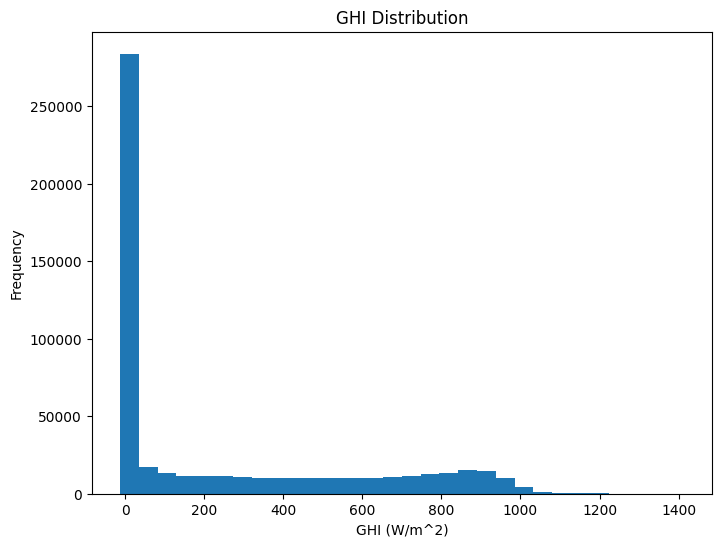

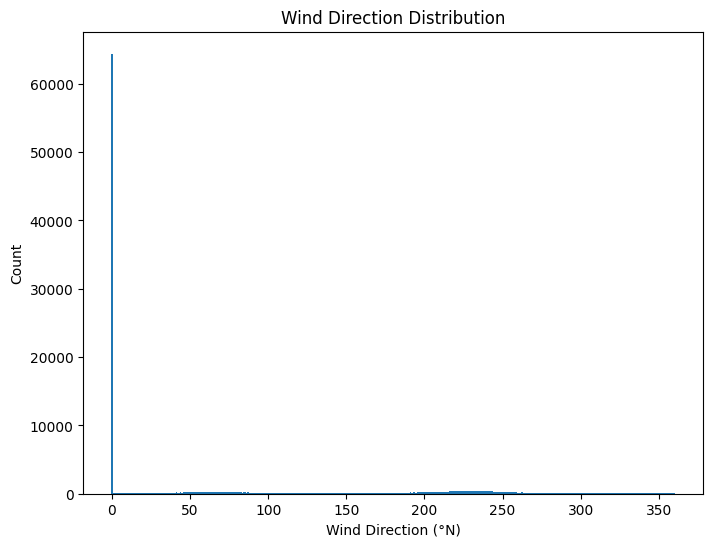

In [9]:
# Histogram for GHI
plt.figure(figsize=(8, 6))
plt.hist(df['GHI'], bins=30)
plt.xlabel('GHI (W/m^2)')
plt.ylabel('Frequency')
plt.title('GHI Distribution')
plt.savefig('plots/ghi_histogram.png')
plt.show()

# Wind rose (simplified bar plot for WD)
wd_counts = df['WD'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(wd_counts.index, wd_counts.values)
plt.xlabel('Wind Direction (°N)')
plt.ylabel('Count')
plt.title('Wind Direction Distribution')
plt.savefig('plots/wind_direction.png')
plt.show()

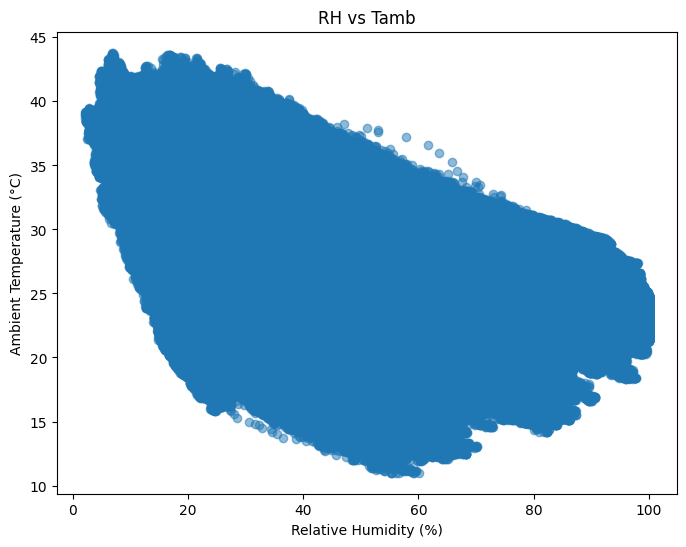

In [10]:
# Scatter plot: RH vs Tamb
plt.figure(figsize=(8, 6))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs Tamb')
plt.savefig('plots/rh_vs_tamb.png')
plt.show()

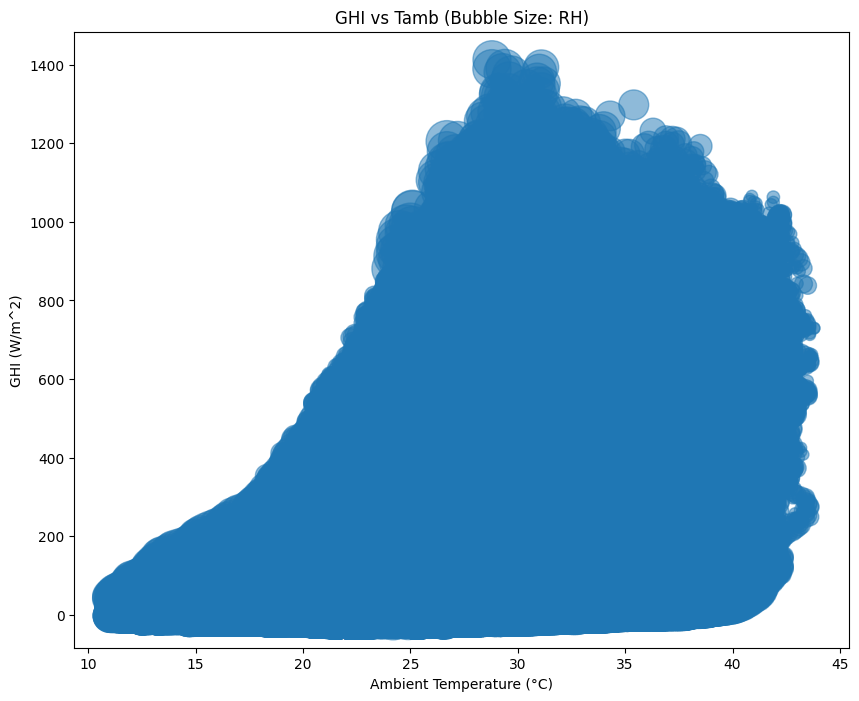

In [11]:
# Bubble chart: GHI vs Tamb, bubble size = RH
plt.figure(figsize=(10, 8))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m^2)')
plt.title('GHI vs Tamb (Bubble Size: RH)')
plt.savefig('plots/bubble_ghi_tamb_rughty')
plt.show()